# Speech Understanding 
# Lecture 11: The SpeechRecognition Module

### Mark Hasegawa-Johnson, KCGI

In today's lecture, we will learn how to use the <a href="https://pypi.org/project/SpeechRecognition/">Speech Recognition</a> module in order to access high-performance commercial and open-source speech recognizers.

Here are the contents:
1. <a href="#section1">Installing SpeechRecognition</a>
1. <a href="#section2">Using SpeechRecognition</a>
1. <a href="#section3">Handling Multiple Languages</a>
1. <a href="#homework">Homework</a>


<a id='section1'></a>

## 1. Installing SpeechRecognition

The <a href="https://pypi.org/project/SpeechRecognition/">SpeechRecognition</a> module in python can be used to call a wide variety of speech-to-text systems.  By default, it uses the Google speech recognizer, which requires web access, but you can set it to use a local speech recognizer on your own machine.  It is installed using pip:


In [1]:
!pip install SpeechRecognition

<a id='section2'></a>

## 2. Using SpeechRecognition

In order to use the `SpeechRecognition` module, we need to create two types of objects.

1. A `Recognizer` object contains the information necessary to do speech recognition.  For example, this object knows whether you're using Google or some other speech recognizer (by default, Google).
1. You also need some type of audio source.  There are two main types of audio source:
    1. A `Microphone` object gets audio from your computer's microphone
    1. An `AudioFile` object gets audio from an audio file

Once you have created both types of objects, then you need to do three things:
1. Get audio from the audio source into the speech recognizer, and
1. Convert the audio into text,
1. Print out what the person said

Here is an example:

In [5]:
import librosa
import IPython.display

x, fs = librosa.load('speech_waveform.wav')
IPython.display.Audio(x, rate=fs)

In [4]:
import speech_recognition

r = speech_recognition.Recognizer()

with speech_recognition.AudioFile("speech_waveform.wav") as source:
    audio = r.record(source)
    text = r.recognize_google(audio)
    print('The person in this audio file said:',text,'.')

The person in this audio file said: this is a speech waveform 11s .


It worked ... sort of!  At least, it correctly recognized the English part, but not the Japanese part.

Let's solve this problem in two steps.

1. First, let's just figure out which part is English, and recognize just that part.
2. Second, we will try to also recognize the Japanese.

Text(0.5, 0, 'Time (in seconds)')

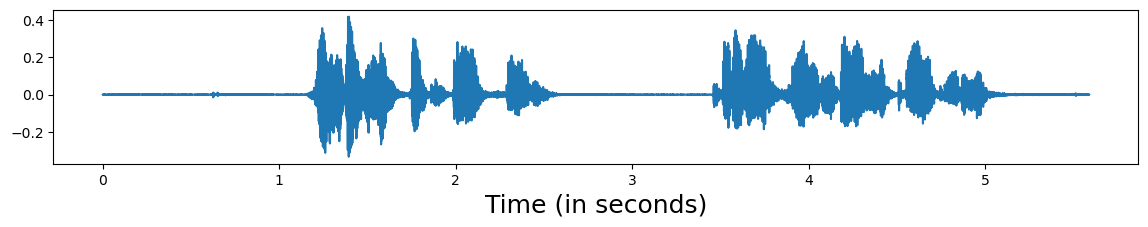

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,2))
subplot = fig.subplots(1,1)
subplot.plot(np.arange(len(x))/fs, x)
subplot.set_xlabel('Time (in seconds)',fontsize=18)

As you can see, this file has several parts:

* The first second is silence
* The next two seconds are English
* The last 2.5 seconds are Japanese

Since the `Recognizer` only knows how to recognize English (so far), we should tell it to only attempt to recognize the first 3 seconds.


In [11]:
with speech_recognition.AudioFile("speech_waveform.wav") as source:
    
    # Recognize just the English part
    audio = r.record(source,duration=3)
    text = r.recognize_google(audio)
    print('The English part of this audio file says: "%s."\n'%(text))
    


The English part of this audio file says: "this is a speech waveform."



<a id='section3'></a>

## 3. Handling multiple languages

In order to handle languages other than English, we need to use the `language` keyword.  For example, let's try to recognize the whole file as Japanese:

In [12]:
with speech_recognition.AudioFile("speech_waveform.wav") as source:
    
    audio = r.record(source)
    text = r.recognize_google(audio,language='ja')
    print('This audio file says: "%s."\n'%(text))
    


This audio file says: "This is speak from これは音声波形です."



Interesting.  It has TRIED to recognize both the English and Japanese, but since it's using a Japanese-language recognition model, it didn't do very well with the English part.  Let's try splitting the two:

In [14]:
with speech_recognition.AudioFile("speech_waveform.wav") as source:

    # Recognize the English part
    audio = r.record(source, duration=3)
    text = r.recognize_google(audio,language='en')
    print('The English part of this audio file says: "%s."\n'%(text))
    
    # Now recognize the remainder of the source
    # Since the source file has not been closed, this part picks up 
    # where the previous part left off: At timestamp = 3 seconds
    audio = r.record(source)
    text = r.recognize_google(audio,language='ja')
    print('The Japanese part of this audio file says: "%s."\n'%(text))


The English part of this audio file says: "this is a speech waveform."

The Japanese part of this audio file says: "これは音声波形です."



<a id='section4'></a>

## 4. Microphone input!

The `speech_recognition` package can also recognize speech input from a microphone!  Here's how:

1. Instead of using an `AudioFile` as a source, use the `Microphone` as the source
2. Use `adjust_for_ambient_noise` to clean up background noise from your recording
3. Use `try....except` to check for errors.  If you get an `UnknownValueError`, a `RequestError`, or a `WaitTimeoutError`, just try again.



In [16]:
import speech_recognition
r = speech_recognition.Recognizer()

while True:
    print('Python is listening...')
    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        try:
            audio = r.listen(source)
            text = r.recognize_google(audio, language='en')
        except speech_recognition.UnknownValueError:
            print('I did not understand that, I will try again')
            continue
        except sr.RequestError:
            print('Sorry, I could not reach the internet, I will try again')
            continue
        except sr.WaitTimeoutError:
            continue
        break

print('You said:',text)


Python is listening...
You said: does the speech recognizer


<a id='homework'></a>

## Homework

Open the file called `homework11.py`.

This file should `def` a function called `transcribe_wavefile`, with the following signature:

In [17]:
import homework11, importlib
importlib.reload(homework11)
help(homework11.transcribe_wavefile)

Help on function transcribe_wavefile in module homework11:

transcribe_wavefile(filename, language='en')
    Use sr.Recognizer.AudioFile(filename) as the source,
    recognize from that source,
    and return the recognized text.

    @params:
    filename (str) - the filename from which to read the audio
    language (str) - the language of the audio (optional; default is English)

    @returns:
    text (str) - the recognized speech



Test whether your code works by running the following block:

In [10]:
importlib.reload(homework11)

text = homework11.transcribe_wavefile("speech_waveform.wav", 'ja')
print(text)

RuntimeError: FAIL!!  You need to change this function so it works!

### Receiving your grade

In order to receive a grade for your homework, you need to:

1. Run the following code block on your machine.  The result may list some errors, and then in the very last line, it will show a score.  That score (between 0% and 100%) is the grade you have earned so far.  If you want to earn a higher grade, please continue editing `homework3.py`, and then run this code block again.
1. When you are happy with your score (e.g., when it reaches 100%), choose `File` $\Rightarrow$ `Save and Checkpoint`.  Then use `GitHub Desktop` to commit and push your changes.
1. Make sure that the 100% shows on your github repo on github.com.  If it doesn't, you will not receive credit.

In [11]:
import importlib, grade
importlib.reload(grade)

EFE
ERROR: test_method_returns_str (grade.Test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec11/grade.py", line 25, in test_method_returns_str
    transcription = homework11.transcribe_wavefile("webdata.wav")
  File "/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec11/homework11.py", line 16, in transcribe_wavefile
    raise RuntimeError("FAIL!!  You need to change this function so it works!")
RuntimeError: FAIL!!  You need to change this function so it works!

ERROR: test_method_works_with_known_input (grade.Test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec11/grade.py", line 35, in test_method_works_with_known_input
    transcription = homework11.tran

0 successes out of 3 tests run
Score: 0%
0 successes out of 3 tests run
Score: 0%


<module 'grade' from '/Users/jhasegaw/Dropbox/mark/teaching/kcgi/intro_speech_understanding/2023_fall/lec11/grade.py'>